# Расчет меторологических характеристик повторяемости ветра по направлениям, относительной влажности воздуха

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('data/times.csv', delimiter=';')

In [4]:
df.head()

,id,year_g,month_g,day_g,time_g,year,month,day,time,wind_direction,wind_mean_velo,wind_max_velo,temperature_wet,partial_pressure,deficit_saturation,pressure_station,pressure_sea
0,27730,1965,12,31,18,1966,1,1,21,160.0,1.0,NaN,NaN,NaN,0.2,983.3,1003.0
1,27730,1965,12,31,21,1966,1,1,0,230.0,8.0,NaN,NaN,NaN,0.6,988.5,1008.3
2,27730,1966,1,1,0,1966,1,1,3,230.0,3.0,NaN,NaN,NaN,0.2,988.5,1008.3
3,27730,1966,1,1,3,1966,1,1,6,230.0,5.0,NaN,NaN,NaN,0.1,987.5,1007.3
4,27730,1966,1,1,6,1966,1,1,9,230.0,6.0,NaN,NaN,NaN,0.5,986.8,1006.4


## Ветер

### Определение направлений

In [5]:
wind_rep = df[['year', 'month', 'day', 'time', 'wind_direction']]
wind_rep = wind_rep[wind_rep['year'].between(1966, 2019)]
wind_rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156571 entries, 0 to 156570
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            156571 non-null  int64  
 1   month           156571 non-null  int64  
 2   day             156571 non-null  int64  
 3   time            156571 non-null  int64  
 4   wind_direction  156517 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 7.2 MB


In [6]:
wind_rep.describe()

,year,month,day,time,wind_direction
count,156571.000000,156571.000000,156571.000000,156571.000000,156517.000000
mean,1992.554668,6.519304,15.730423,10.499952,174.750232
std,15.619633,3.454087,8.800677,6.873990,109.919325
min,1966.000000,1.000000,1.000000,0.000000,0.000000
25%,1979.000000,4.000000,8.000000,3.000000,80.000000
50%,1993.000000,7.000000,16.000000,9.000000,188.000000
75%,2006.000000,10.000000,23.000000,18.000000,260.000000
max,2019.000000,12.000000,31.000000,21.000000,360.000000


In [7]:
wind_rep = wind_rep.dropna(axis=0)
wind_rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156517 entries, 0 to 156570
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            156517 non-null  int64  
 1   month           156517 non-null  int64  
 2   day             156517 non-null  int64  
 3   time            156517 non-null  int64  
 4   wind_direction  156517 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 7.2 MB


In [8]:
wind_rep['wind_direction'] = wind_rep['wind_direction'].astype('int64')
wind_rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156517 entries, 0 to 156570
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   year            156517 non-null  int64
 1   month           156517 non-null  int64
 2   day             156517 non-null  int64
 3   time            156517 non-null  int64
 4   wind_direction  156517 non-null  int64
dtypes: int64(5)
memory usage: 7.2 MB


(array([28382.,  9592.,  6654., 11182., 14644., 25030., 19434., 12206.,
        15632., 13761.]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <BarContainer object of 10 artists>)

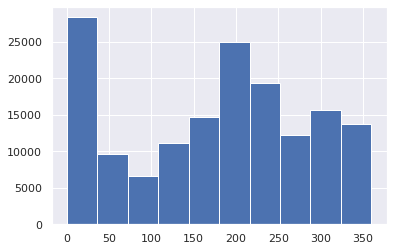

In [9]:
plt.hist(wind_rep['wind_direction'])

In [10]:
# стороны света
N1 = range(1, 23) # север (1-ый сектор)
NE = range(23, 68) # северо-восток
E = range(68, 113) # восток
SE = range(113, 158) # юго-восток
S = range(158, 203) # юг
SW = range(203, 248) # юго-запад
W = range(248, 293) # запад
NW = range(293, 338) # северо-запад
N2 = range(338, 361) # север (2-й сектор)
calm = [0] # отсутствие ветра (штиль)

CP = [N1, NE, E, SE, S, SW, W, NW, N2, calm]
CP

[range(1, 23),
 range(23, 68),
 range(68, 113),
 range(113, 158),
 range(158, 203),
 range(203, 248),
 range(248, 293),
 range(293, 338),
 range(338, 361),
 [0]]

In [11]:
# формируем лист с перечнем направлений (в виде ренджев) для каждого срока
direction = []

for wind in wind_rep['wind_direction']:
    
    for n in CP:
        
        for degree in n:
            
            if wind == degree:
                direction.append(n)

In [12]:
direction[:10]

[range(158, 203),
 range(203, 248),
 range(203, 248),
 range(203, 248),
 range(203, 248),
 range(203, 248),
 range(248, 293),
 [0],
 range(158, 203),
 range(248, 293)]

In [13]:
len(direction)

156517

In [14]:
cardinal_points = {range(1, 23): 'N1', range(23, 68):'NE', 
                   range(68, 113): 'E', range(113, 158) : 'SE', 
                   range(158, 203): 'S', range(203, 248):  'SW', 
                   range(248, 293): 'W', range(293, 338): 'NW', 
                   range(338, 361): 'N2', 0: 'calm'}

In [15]:
cardinal_points.get((0))

'calm'

In [16]:
# переводим направление в буквенное обозначение
direction_get = []

for ran in direction:
    
    if ran == [0]:
        ran = 0
                
    name_of_CP = cardinal_points.get(ran)
    
    direction_get.append(name_of_CP)

In [17]:
direction_get[:10]

['S', 'SW', 'SW', 'SW', 'SW', 'SW', 'W', 'calm', 'S', 'W']

In [18]:
len(direction_get)

156517

In [19]:
wind_rep['direction'] = direction_get

In [20]:
wind_rep.head(10)

,year,month,day,time,wind_direction,direction
0,1966,1,1,21,160,S
1,1966,1,1,0,230,SW
2,1966,1,1,3,230,SW
3,1966,1,1,6,230,SW
4,1966,1,1,9,230,SW
5,1966,1,1,12,230,SW
6,1966,1,1,15,250,W
7,1966,1,1,18,0,calm
8,1966,1,2,21,180,S
9,1966,1,2,0,270,W


In [21]:
wind_rep.direction.value_counts()

S       29734
W       21060
SW      20170
calm    19282
NW      14668
SE      13436
E       11381
N2      10548
NE      10017
N1       6221
Name: direction, dtype: int64

In [22]:
# преобразуем N1 и N2 в N
wind_rep['direction'] = wind_rep['direction'].apply(
    lambda x: 'N' if x == 'N1' or x == 'N2' else x)

In [23]:
wind_rep.direction.value_counts()

S       29734
W       21060
SW      20170
calm    19282
N       16769
NW      14668
SE      13436
E       11381
NE      10017
Name: direction, dtype: int64

In [24]:
wind_rep.head(10)

,year,month,day,time,wind_direction,direction
0,1966,1,1,21,160,S
1,1966,1,1,0,230,SW
2,1966,1,1,3,230,SW
3,1966,1,1,6,230,SW
4,1966,1,1,9,230,SW
5,1966,1,1,12,230,SW
6,1966,1,1,15,250,W
7,1966,1,1,18,0,calm
8,1966,1,2,21,180,S
9,1966,1,2,0,270,W


### Повторяемость ветра без учета штилья

In [25]:
wind_without_calm = wind_rep[wind_rep['direction'] != 'calm']
wind_without_calm = wind_without_calm[['year', 'month', 'direction']]
wind_without_calm

,year,month,direction
0,1966,1,S
1,1966,1,SW
2,1966,1,SW
3,1966,1,SW
4,1966,1,SW
...,...,...,...
156566,2019,12,W
156567,2019,12,W
156568,2019,12,W
156569,2019,12,SW


In [26]:
# добавляем столбец с суммой наблюдений ветра для расчета долей по месяцам
wind_piv_1 = wind_without_calm.pivot_table(columns='direction', 
                                           index='month', 
                                           aggfunc='count'
                                          )
wind_piv_1['sum'] = wind_piv_1.sum(axis=1)
wind_piv_1

year                                              sum
direction     E     N    NE    NW     S    SE    SW     W       
month                                                           
1           738  1172   578  1151  2984  1193  2268  1916  12000
2           918  1058   490  1046  2744  1356  1719  1477  10808
3          1085   959   526  1029  3297  1409  1908  1695  11908
4          1308  1348   912  1024  2721  1319  1432  1381  11445
5          1359  1765  1297  1156  2041  1165  1181  1456  11420
6           992  1825  1108  1469  1499   817  1236  1713  10659
7          1035  1910  1250  1493  1560   971  1084  1724  11027
8          1031  1804  1287  1394  1566   919  1161  1812  10974
9           838  1499   834  1358  2055   982  1477  1842  10885
10          594  1455   587  1463  2857   881  1989  2235  12061
11          721   981   601   976  3114  1091  2261  1938  11683
12          762   993   547  1109  3296  1333  2454  1871  12365

In [27]:
wind_piv_1.loc[:, 'sum'].values 

array([12000, 10808, 11908, 11445, 11420, 10659, 11027, 10974, 10885,
       12061, 11683, 12365])

In [28]:
# расчет повторяемости по меясцам
one_dir_tables = []
for i in range(0,8):

    col_of_dir = (wind_piv_1.iloc[:, i] 
                  / wind_piv_1.loc[:, 'sum'].values * 100)
    
    one_dir_tables.append(col_of_dir)

repeability = pd.concat(one_dir_tables, axis=1).round(1)
repeability

year                                          
          E     N    NE    NW     S    SE    SW     W
month                                                
1       6.2   9.8   4.8   9.6  24.9   9.9  18.9  16.0
2       8.5   9.8   4.5   9.7  25.4  12.5  15.9  13.7
3       9.1   8.1   4.4   8.6  27.7  11.8  16.0  14.2
4      11.4  11.8   8.0   8.9  23.8  11.5  12.5  12.1
5      11.9  15.5  11.4  10.1  17.9  10.2  10.3  12.7
6       9.3  17.1  10.4  13.8  14.1   7.7  11.6  16.1
7       9.4  17.3  11.3  13.5  14.1   8.8   9.8  15.6
8       9.4  16.4  11.7  12.7  14.3   8.4  10.6  16.5
9       7.7  13.8   7.7  12.5  18.9   9.0  13.6  16.9
10      4.9  12.1   4.9  12.1  23.7   7.3  16.5  18.5
11      6.2   8.4   5.1   8.4  26.7   9.3  19.4  16.6
12      6.2   8.0   4.4   9.0  26.7  10.8  19.8  15.1

In [29]:
# рассчитываем повторяемость для года
wind_without_year = wind_without_calm.pivot_table(columns='direction', 
                                                  index='year',
                             aggfunc='count'
                             )
wind_without_year.mean()
wind_without_year.mean().sum()
repeability_year = (wind_without_year.mean() 
                    / wind_without_year.mean().sum() * 100)
repeability_year

       direction
month  E             8.293074
       N            12.219186
       NE            7.299158
       NW           10.688236
       S            21.666484
       SE            9.790505
       SW           14.697417
       W            15.345939
dtype: float64

In [30]:
repeability.loc['Год'] = np.array(repeability_year.round(1))
repeability

year                                          
          E     N    NE    NW     S    SE    SW     W
month                                                
1       6.2   9.8   4.8   9.6  24.9   9.9  18.9  16.0
2       8.5   9.8   4.5   9.7  25.4  12.5  15.9  13.7
3       9.1   8.1   4.4   8.6  27.7  11.8  16.0  14.2
4      11.4  11.8   8.0   8.9  23.8  11.5  12.5  12.1
5      11.9  15.5  11.4  10.1  17.9  10.2  10.3  12.7
6       9.3  17.1  10.4  13.8  14.1   7.7  11.6  16.1
7       9.4  17.3  11.3  13.5  14.1   8.8   9.8  15.6
8       9.4  16.4  11.7  12.7  14.3   8.4  10.6  16.5
9       7.7  13.8   7.7  12.5  18.9   9.0  13.6  16.9
10      4.9  12.1   4.9  12.1  23.7   7.3  16.5  18.5
11      6.2   8.4   5.1   8.4  26.7   9.3  19.4  16.6
12      6.2   8.0   4.4   9.0  26.7  10.8  19.8  15.1
Год     8.3  12.2   7.3  10.7  21.7   9.8  14.7  15.3

## Повторяемость штилей

In [31]:
wind_with_calm = wind_rep[wind_rep['direction'] == 'calm']
wind_with_calm = wind_with_calm[['year', 'month', 'direction']]
wind_with_calm

,year,month,direction
7,1966,1,calm
10,1966,1,calm
11,1966,1,calm
12,1966,1,calm
13,1966,1,calm
...,...,...,...
156530,2019,12,calm
156531,2019,12,calm
156532,2019,12,calm
156533,2019,12,calm


In [32]:
calm = wind_with_calm.groupby('month')['direction'].value_counts()
calm


month  direction
1      calm         1384
2      calm         1389
3      calm         1482
4      calm         1272
5      calm         1721
6      calm         2060
7      calm         2361
8      calm         2412
9      calm         1822
10     calm         1324
11     calm         1034
12     calm         1021
Name: direction, dtype: int64

In [33]:
# по месяцам
calm_month = np.array(calm / calm.sum() * 100)
calm_month

array([ 7.17767866,  7.20360958,  7.6859247 ,  6.59682606,  8.92542267,
       10.68353905, 12.24458044, 12.50907582,  9.44922726,  6.86650762,
        5.36251426,  5.29509387])

In [34]:
# для года
calm_year = calm.sum() / wind_rep.direction.value_counts().sum() * 100
calm_year

12.31942856047586

In [35]:
# массив с месячными значениями и годовым 
calm_all = np.insert(calm_month, 12, calm_year)

In [36]:
repeability['Штиль'] = np.array(calm_all.round(1))
repeability

year                                           Штиль
          E     N    NE    NW     S    SE    SW     W      
month                                                      
1       6.2   9.8   4.8   9.6  24.9   9.9  18.9  16.0   7.2
2       8.5   9.8   4.5   9.7  25.4  12.5  15.9  13.7   7.2
3       9.1   8.1   4.4   8.6  27.7  11.8  16.0  14.2   7.7
4      11.4  11.8   8.0   8.9  23.8  11.5  12.5  12.1   6.6
5      11.9  15.5  11.4  10.1  17.9  10.2  10.3  12.7   8.9
6       9.3  17.1  10.4  13.8  14.1   7.7  11.6  16.1  10.7
7       9.4  17.3  11.3  13.5  14.1   8.8   9.8  15.6  12.2
8       9.4  16.4  11.7  12.7  14.3   8.4  10.6  16.5  12.5
9       7.7  13.8   7.7  12.5  18.9   9.0  13.6  16.9   9.4
10      4.9  12.1   4.9  12.1  23.7   7.3  16.5  18.5   6.9
11      6.2   8.4   5.1   8.4  26.7   9.3  19.4  16.6   5.4
12      6.2   8.0   4.4   9.0  26.7  10.8  19.8  15.1   5.3
Год     8.3  12.2   7.3  10.7  21.7   9.8  14.7  15.3  12.3

### Итоговая таблица

In [37]:
repeability.columns = ['В', 'С', 'СВ', 'СЗ', 'Ю', 'ЮВ', 'ЮЗ', 'З', 'Штиль']

In [38]:
repeability = repeability[['С', 'СВ', 'В', 'ЮВ', 
                           'Ю', 'ЮЗ', 'З', 'СЗ', 'Штиль']]

In [39]:
repeability

,С,СВ,В,ЮВ,Ю,ЮЗ,З,СЗ,Штиль
month,,,,,,,,,
1,9.8,4.8,6.2,9.9,24.9,18.9,16.0,9.6,7.2
2,9.8,4.5,8.5,12.5,25.4,15.9,13.7,9.7,7.2
3,8.1,4.4,9.1,11.8,27.7,16.0,14.2,8.6,7.7
4,11.8,8.0,11.4,11.5,23.8,12.5,12.1,8.9,6.6
5,15.5,11.4,11.9,10.2,17.9,10.3,12.7,10.1,8.9
6,17.1,10.4,9.3,7.7,14.1,11.6,16.1,13.8,10.7
7,17.3,11.3,9.4,8.8,14.1,9.8,15.6,13.5,12.2
8,16.4,11.7,9.4,8.4,14.3,10.6,16.5,12.7,12.5
9,13.8,7.7,7.7,9.0,18.9,13.6,16.9,12.5,9.4


In [40]:
repeability.to_csv('results/wind_repeability.csv')

## Влажность

In [41]:
hum_data = pd.read_csv('data/humidity.csv', delimiter=';')
hum_data.head()

,id,year,jan,feb,march,april,may,june,july,aug,sept,oct,nov,dec
0,27730,1966,88.0,81.0,87.0,72.0,60.0,67.0,70.0,66.0,73.0,78.0,91.0,84.0
1,27730,1967,83.0,84.0,88.0,79.0,51.0,66.0,65.0,70.0,71.0,81.0,85.0,89.0
2,27730,1968,86.0,86.0,83.0,65.0,60.0,58.0,74.0,70.0,69.0,82.0,89.0,85.0
3,27730,1969,72.0,66.0,73.0,73.0,60.0,67.0,69.0,71.0,73.0,81.0,88.0,84.0
4,27730,1970,82.0,79.0,77.0,79.0,61.0,65.0,67.0,72.0,78.0,87.0,88.0,84.0


In [42]:
hum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      62 non-null     int64  
 1   year    62 non-null     int64  
 2   jan     60 non-null     float64
 3   feb     59 non-null     float64
 4   march   60 non-null     float64
 5   april   59 non-null     float64
 6   may     58 non-null     float64
 7   june    59 non-null     float64
 8   july    59 non-null     float64
 9   aug     58 non-null     float64
 10  sept    58 non-null     float64
 11  oct     59 non-null     float64
 12  nov     59 non-null     float64
 13  dec     59 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 6.9 KB


In [43]:
hum_data.describe()

,id,year,jan,feb,march,april,may,june,july,aug,sept,oct,nov,dec
count,62.0,62.000000,60.000000,59.000000,60.000000,59.000000,58.000000,59.00000,59.000000,58.000000,58.000000,59.000000,59.000000,59.000000
mean,27730.0,1991.709677,84.166667,81.440678,77.200000,68.305085,60.724138,68.20339,71.542373,72.465517,77.431034,81.203390,86.237288,85.813559
std,0.0,14.310820,3.809741,3.949121,4.394912,5.942988,5.600104,5.26465,6.159719,6.187751,4.834496,3.427976,3.024834,3.501106
min,27730.0,1966.000000,72.000000,66.000000,67.000000,51.000000,49.000000,55.00000,53.000000,49.000000,68.000000,71.000000,80.000000,79.000000
25%,27730.0,1981.250000,82.000000,79.000000,75.000000,65.500000,57.000000,65.50000,69.000000,70.000000,74.000000,79.000000,84.000000,84.000000
50%,27730.0,1991.000000,84.000000,82.000000,77.000000,69.000000,60.000000,70.00000,72.000000,73.000000,77.000000,81.000000,86.000000,86.000000
75%,27730.0,2002.750000,87.000000,84.000000,79.000000,72.000000,64.000000,72.00000,75.000000,77.000000,80.750000,84.000000,88.500000,88.000000
max,27730.0,2018.000000,91.000000,88.000000,89.000000,79.000000,73.000000,77.00000,83.000000,84.000000,88.000000,87.000000,94.000000,96.000000


In [44]:
humidity = hum_data.dropna(axis=0).copy()
humidity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 61
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      57 non-null     int64  
 1   year    57 non-null     int64  
 2   jan     57 non-null     float64
 3   feb     57 non-null     float64
 4   march   57 non-null     float64
 5   april   57 non-null     float64
 6   may     57 non-null     float64
 7   june    57 non-null     float64
 8   july    57 non-null     float64
 9   aug     57 non-null     float64
 10  sept    57 non-null     float64
 11  oct     57 non-null     float64
 12  nov     57 non-null     float64
 13  dec     57 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 6.7 KB


In [45]:
humidity['year'].describe()

count      57.000000
mean     1992.526316
std        14.397551
min      1966.000000
25%      1983.000000
50%      1991.000000
75%      2004.000000
max      2018.000000
Name: year, dtype: float64

In [46]:
month_mean = humidity.mean().to_frame().transpose().round(1).loc[:,'jan':'dec']
year_mean = round(humidity.loc[:, 'jan':'dec'].mean(axis=1).mean(), 1)

In [47]:
month_mean.columns = range(1,13)

In [48]:
month_mean['Год'] = year_mean
month_mean

,1,2,3,4,5,6,7,8,9,10,11,12,Год
0,84.2,81.5,77.1,68.1,60.6,68.0,71.3,72.3,77.4,81.3,86.3,85.8,76.2


In [49]:
month_mean.to_csv('results/relative_humidity.csv')

<AxesSubplot:>

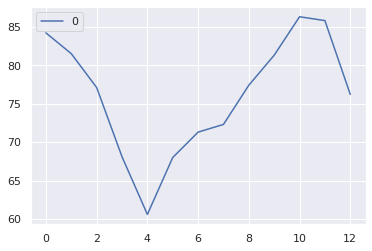

In [50]:
month_mean.transpose().reset_index().plot()